In [105]:
import numpy as np
file_paths = {
    'degree': 'degree.npy',
    's_in': 's_in.npy',
    'sa_bias': 'sa_bias.npy'
}
data = {}
for key, path in file_paths.items():
    try:
        data[key] = np.load(path)
        print(f"Shape of {key}: {data[key].shape}")
    except FileNotFoundError:
        print(f"Error: '{path}' not found.")
    except Exception as e:
        print(f"An error occurred while loading '{path}': {str(e)}")

Shape of degree: (128,)
Shape of s_in: (128, 24)
Shape of sa_bias: (128, 128)


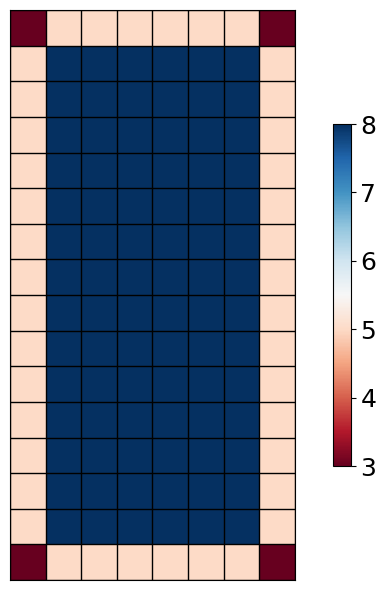

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Heatmap for s_in
s_in_matrix = data['degree'].reshape(16, 8)
cmap_in = plt.get_cmap('RdBu')
norm_in = plt.Normalize(vmin=np.min(s_in_matrix), vmax=np.max(s_in_matrix))

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(s_in_matrix, cmap=cmap_in, norm=norm_in)
ax.set_xticks(np.arange(-.5, 8, 1))
ax.set_yticks(np.arange(-.5, 16, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='major', color='black', linestyle='-', linewidth=1)
ax.tick_params(length=0)
cb = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.6)
cb.ax.tick_params(labelsize=18)

plt.tight_layout()
plt.savefig('s_in_heatmap.pdf', format='pdf', bbox_inches='tight')


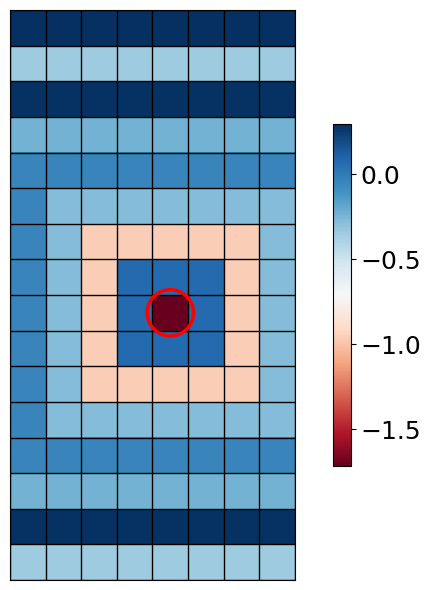

In [107]:
# Heatmap for sa_bias
node_id = 68
sa_bias_matrix = data['sa_bias'][node_id, :].reshape(16, 8)
norm_bias = plt.Normalize(vmin=np.min(sa_bias_matrix), vmax=np.max(sa_bias_matrix))

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(sa_bias_matrix, cmap=cmap_in, norm=norm_bias)
ax.set_xticks(np.arange(-.5, 8, 1))
ax.set_yticks(np.arange(-.5, 16, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='major', color='black', linestyle='-', linewidth=1)
ax.tick_params(length=0)
# Add colorbar
cb = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.6)
cb.ax.tick_params(labelsize=18)
# Highlight the specific node
highlight_node_row = node_id // 8
highlight_node_col = node_id % 8
ax.add_patch(plt.Circle((highlight_node_col, highlight_node_row), 0.65, color='red', fill=False, linewidth=2.5, zorder=3))

plt.tight_layout()
plt.savefig('sa_bias_heatmap.pdf', format='pdf', bbox_inches='tight')